# Big Mart sales prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.
The main aim is to build a predictive model using the train data . By using the model we will be able to understand the variables which play vital part in Big Mart slaes. 

In [494]:
# Importing all the library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading and pre procesing  the dataset
1. Reading the data from the csv file.
2. Reading the data set and find all the information from the data set such data type, null values etc.
3. If there is any null value replace with mean or median.
4. Describing the data set to find the stastical information .


In [495]:
df= pd.read_csv('Train (3).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [496]:
#Data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [497]:
#Shape of the data set
df.shape

(8523, 12)

In [498]:
#Summary of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [499]:
#Statstical information
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


# Missing Values

In [500]:
#Finding the null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As there is missing value in item_weight and outlet_size we need to repalce the null values with mean or median

In [501]:
#To handle he missing value in Item_weight we need to replace the msissing data to mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

# Exploratory data analysis
 In the exploratory data analysis we will be analyising each variable throughly. 
 1. Univariate analysis.
 2. Bivariate analysis.
 3. Multivariate analysis.

# Univariate analysis

In [502]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


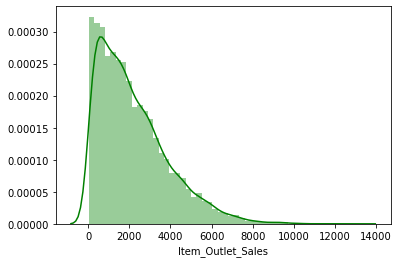

In [503]:
# Item_outlet_sales
sns.distplot(df['Item_Outlet_Sales'], color='green')

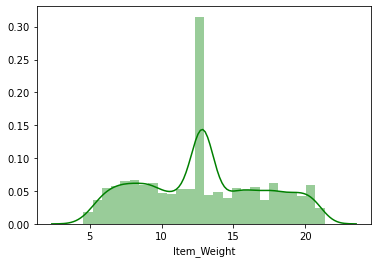

In [504]:
#Distribution of the Item_Weight
sns.distplot(df['Item_Weight'], color='green')

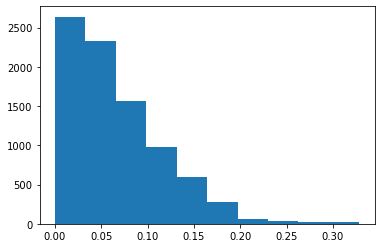

In [505]:
#Item_visibility
#sns.kdeplot(df['Item_Visibility'],color='green')
plt.hist(df['Item_Visibility'])
plt.show()

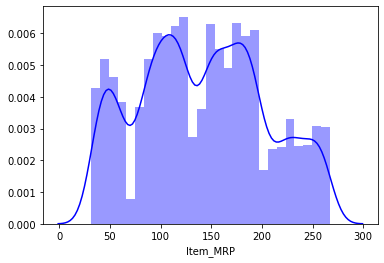

In [506]:
sns.distplot(df['Item_MRP'],color='blue')

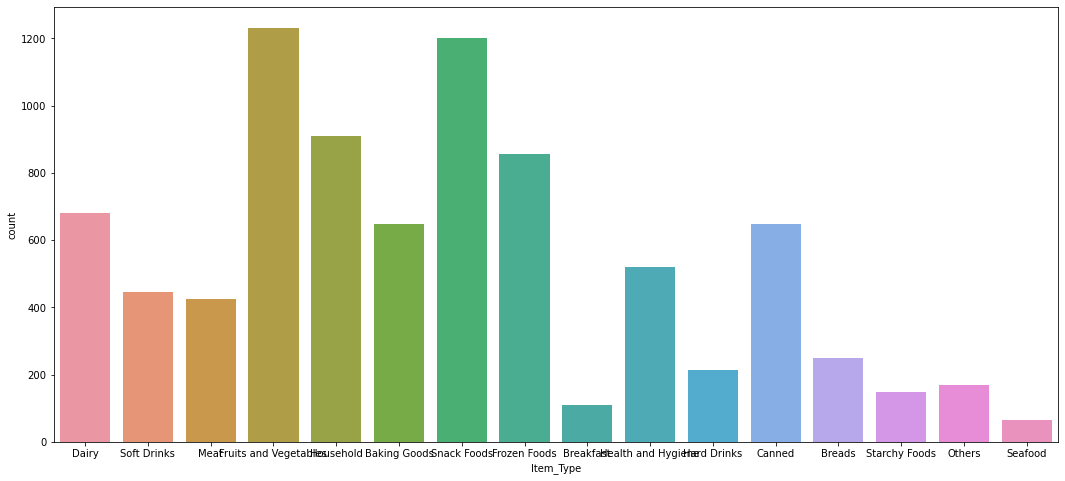

In [507]:
#Item_type
plt.figure(figsize=(18,8 ))
sns.countplot(df['Item_Type'])
plt.show()

In [508]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we can see that there is something wrong in this column  as LF belong to low fat and reg as regular and also thr low fat is same as Low Fat

In [509]:
# Fixing and replacing 
df.Item_Fat_Content=df.Item_Fat_Content.replace('LF','Low Fat')


In [510]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

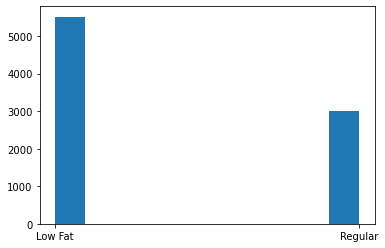

In [511]:
plt.figure(figsize=(6,4))
plt.hist(df['Item_Fat_Content'])
plt.show()

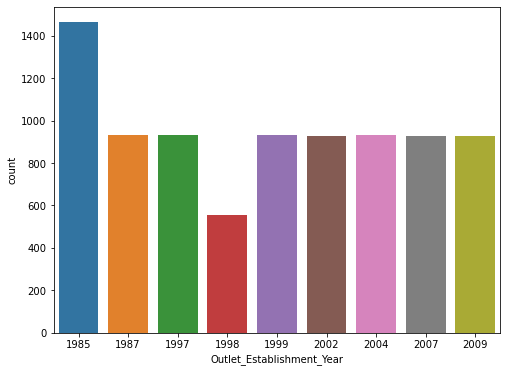

In [512]:
#Outlet_Establishment_Year
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

In [513]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

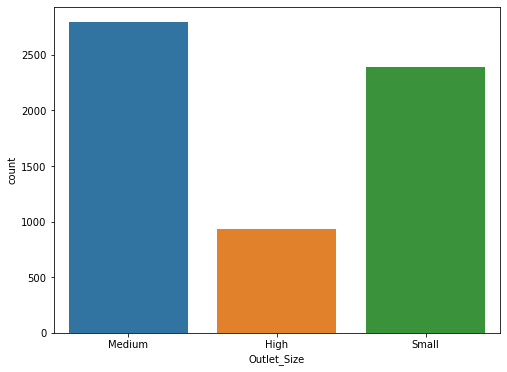

In [514]:
#Outlet_size
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Size'])
plt.show()

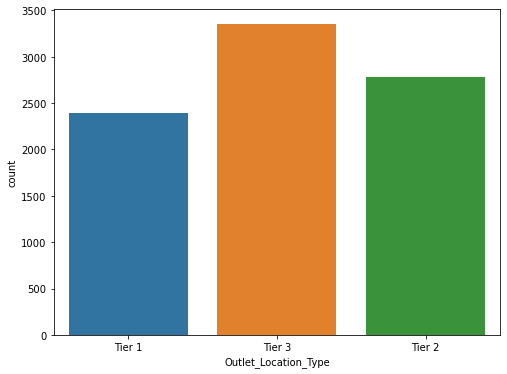

In [515]:
#Outlet_loction_type
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Location_Type'])
plt.show()

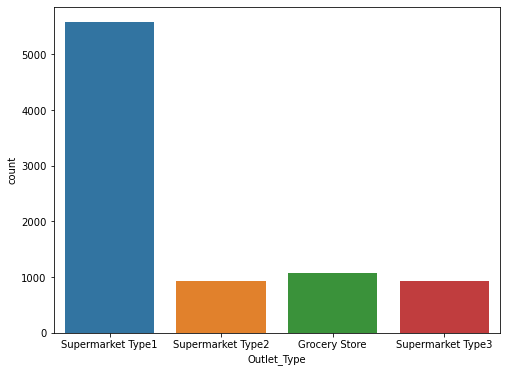

In [516]:
#Outlet_Type
plt.figure(figsize=(8,6))
sns.countplot(df['Outlet_Type'])
plt.show()

# Bivariate analysis

In [517]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


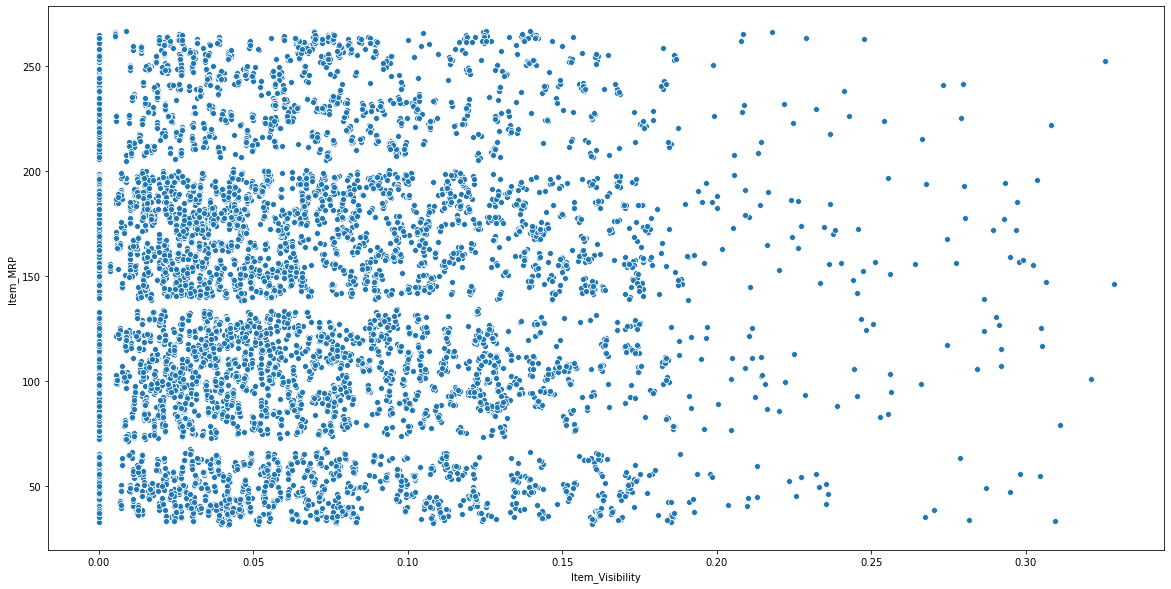

In [518]:
# To analyse the Item_MRP and Item_Visbility 
plt.figure(figsize=(20,10))
sns.scatterplot(x='Item_Visibility' , y='Item_MRP',data=df)


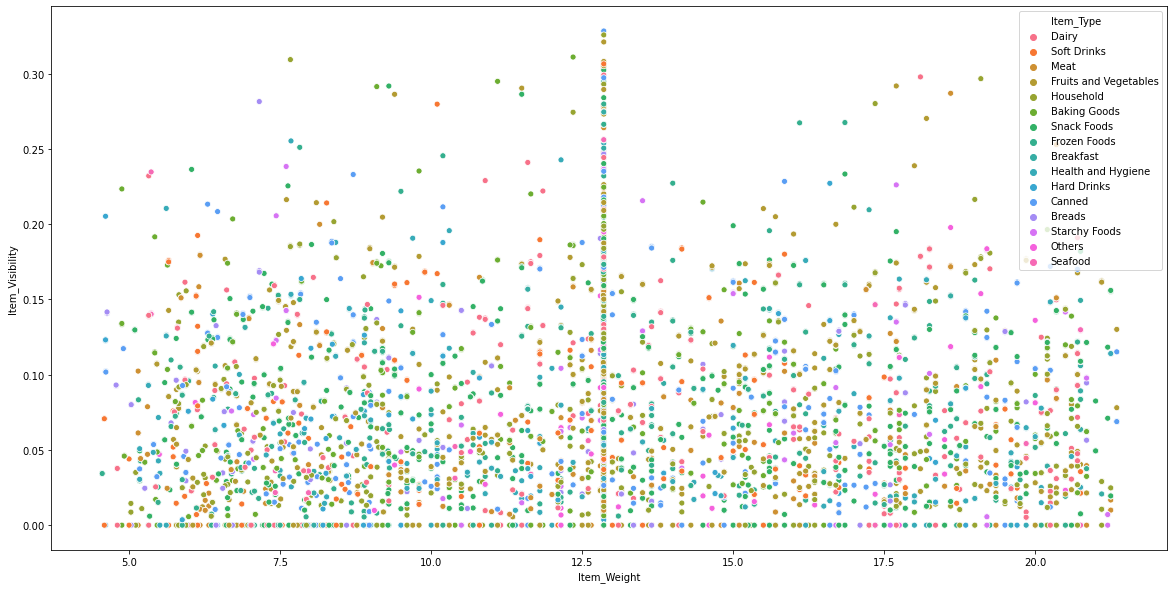

In [519]:
#Item_weight and Item_visibility
plt.figure(figsize=(20,10))
sns.scatterplot(x='Item_Weight', y='Item_Visibility' ,data=df,hue='Item_Type')

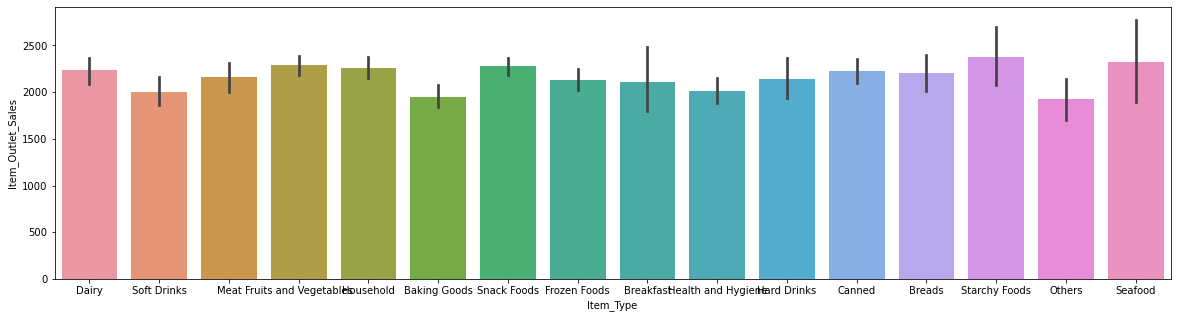

In [520]:
#Item_type and Item_outlet_sales
plt.figure(figsize=(20,5))

sns.barplot(x='Item_Type', y='Item_Outlet_Sales',data= df)

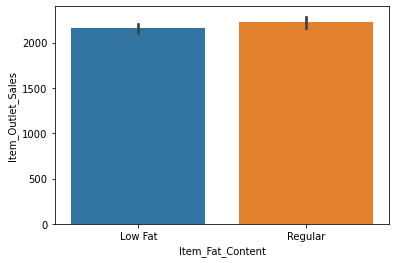

In [521]:
#Item_outlet_sales in fat conent wise
plt.figure(figsize=(6,4))

sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data= df)

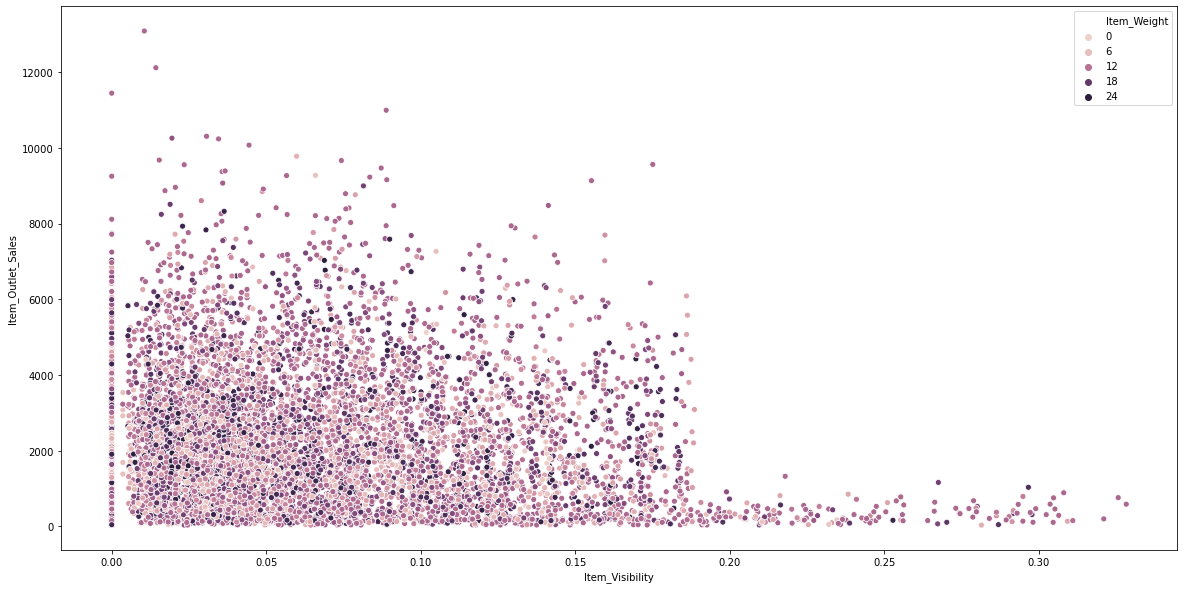

In [522]:
# Out_let_sales and visibility analysis with item_weight
plt.figure(figsize=(20,10))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Weight',data=df,color='green')

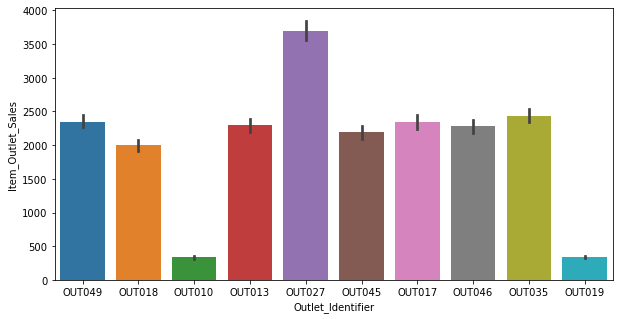

In [523]:
#Visulaising the outlet_identifier and Item_Outlet_sales
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales',data=df)


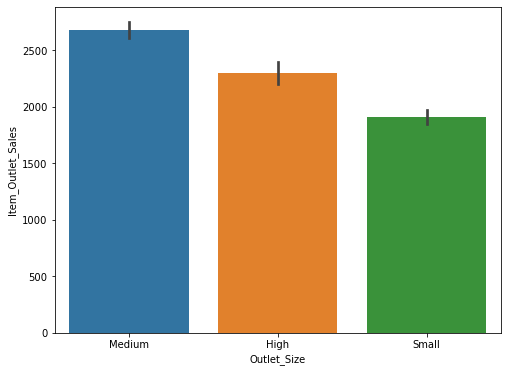

In [524]:
#Outlet_Size and Item_outlet_sales
plt.figure(figsize=(8,6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales',data=df)



# Corelation of diifernet variables

In [525]:
 df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


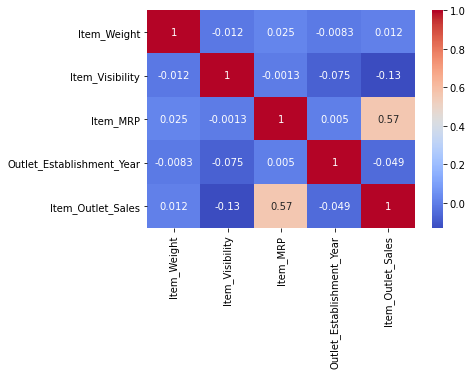

In [526]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

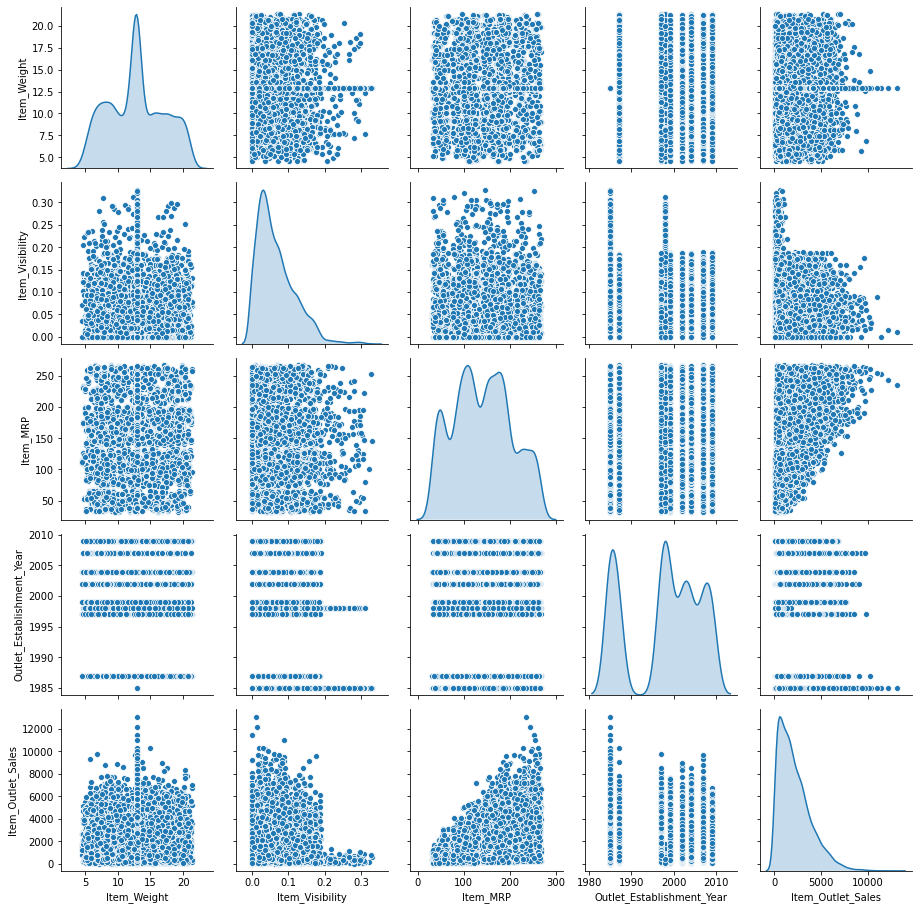

In [527]:
sns.pairplot(df,diag_kind='kde')

As we can see from the correlation and matrix and pairplot that only few of the variables has impact on the targert variable out_let_sales. Among the indepnedent variable only MRP has significant positive correlation 0.57 . Other variables don't have much impact . We need to see the categorical varibale if they have any impact  on the target variable.

# Label encoding
For handleing the categorical variable we used label encoding and Onehot encoding.


Some of the categorical data are.
1. Nominal data
2. Ordinal data

In [528]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])


In [529]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Typer']=le.fit_transform(df['Item_Type'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])



In [530]:
#df['Outlet_Size']=le.fit_transform(df['Outlet_Size']) # As there is missing value in the data set
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [531]:
df['Outlet_Size']=pd.Categorical(df['Outlet_Size'],['Small', 'Medium', 'High'], ordered=True)

In [532]:
df['Outlet_Size']=df['Outlet_Size'].cat.codes

In [533]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Typer
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,4
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,14
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,10
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,0,1998,-1,2,0,732.3800,6
4,NCD19,8.93,0,0.000000,Household,53.8614,1,1987,2,2,1,994.7052,9


# Onehot coding

In [534]:
df=pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type',])


In [535]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Typer,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,Dairy,249.8092,9,1999,3735.1380,4,1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,3,2009,443.4228,14,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,9,1999,2097.2700,10,1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,0,1998,732.3800,6,0,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,1,1987,994.7052,9,1,...,0,0,1,0,0,1,0,1,0,0


In [536]:
#Droping one column
df=df.drop('Item_Type',axis=1)

In [537]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Typer,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,249.8092,9,1999,3735.1380,4,1,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,3,2009,443.4228,14,0,1,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,9,1999,2097.2700,10,1,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,0,1998,732.3800,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1,1987,994.7052,9,1,0,...,0,0,1,0,0,1,0,1,0,0


# Test data

In [538]:
df2=pd.read_csv('Test (3).csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [539]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

# Preprocessing data

In [540]:
#Data types
df2.dtypes
#Summary of the data set
df2.info()
df2.isnull().sum()

#To handle he missing value in Item_weight we need to replace the msissing data to mean value
df2['Item_Weight'].fillna(df2['Item_Weight'].mean(),inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [541]:

# Fixing and replacing 
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace('LF','Low Fat')

df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace('reg','Regular')
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace('low fat','Low Fat')
df2['Item_Fat_Content'].value_counts()



Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [542]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Outlet_Identifier']=le.fit_transform(df2['Outlet_Identifier'])

df2['Item_Fat_Content']=le.fit_transform(df2['Item_Fat_Content'])
df2['Item_Typer']=le.fit_transform(df2['Item_Type'])
#df['Outlet_Size']=le.fit_transform(df['Outlet_Size']) # As there is missing value in the data set
df2['Outlet_Location_Type']=le.fit_transform(df2['Outlet_Location_Type'])
df2['Outlet_Type']=le.fit_transform(df2['Outlet_Type'])


df2['Outlet_Size']=pd.Categorical(df2['Outlet_Size'],['Small', 'Medium', 'High'], ordered=True)

df2['Outlet_Size']=df2['Outlet_Size'].cat.codes


df2=pd.get_dummies(df2, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type',])

#Droping one column
df2=df2.drop('Item_Type',axis=1)



In [543]:
df2.shape


(5681, 20)

In [544]:
df.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Typer,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,249.8092,9,1999,3735.1380,4,1,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,3,2009,443.4228,14,0,1,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,9,1999,2097.2700,10,1,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,0,1998,732.3800,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,1,1987,994.7052,9,1,0,...,0,0,1,0,0,1,0,1,0,0


# Training the model


In [545]:
#Input split
X= df.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Identifier'])
y= df['Item_Outlet_Sales']

In [546]:
#Important feature using extratreesregressor
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [547]:
print(selection.feature_importances_)


[0.06148405 0.09529004 0.44771043 0.07059429 0.01027561 0.01038983
 0.00739676 0.01032536 0.00623365 0.00359706 0.00667504 0.00691288
 0.00379121 0.17898244 0.00246926 0.0021162  0.07575589]


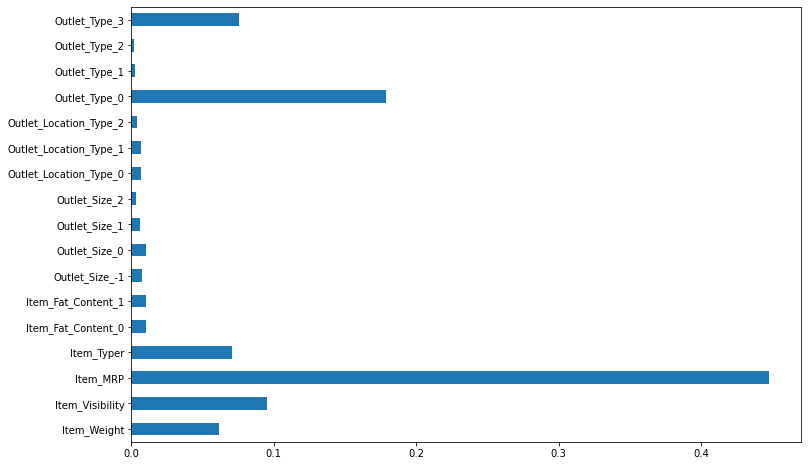

In [548]:
# Visualising the importance feature
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.plot(kind='barh')

# Fitting the model using random forest

In [549]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [550]:
from sklearn.ensemble import RandomForestRegressor 
reg_rf= RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [551]:
reg_rf.score(X_train,y_train)

0.9370951577376084

In [552]:
reg_rf.score(X_test,y_test)

0.560494148240478

In [553]:
#Vislizing the test and tarin data
y_pred= reg_rf.predict(X_test)

Text(0, 0.5, 'y_pred')

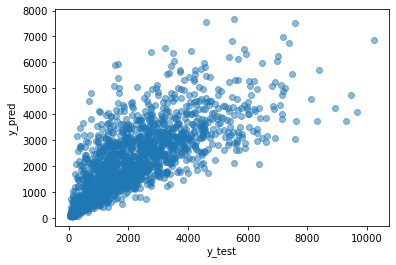

In [554]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')